In [ ]:
!pip install texttable
!pip install texttable rasterio

import ee
import geemap
import os
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.exposure import match_histograms
import time
import texttable as tt
import rasterio
from rasterio.plot import reshape_as_raster

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path configuration
# Path configuration for Google Drive
out_dir = '/content/drive/My Drive/Pansharpening'
filename_b2 = os.path.join(out_dir, 'sentinel_image_20221125_B2.tif')
filename_b3 = os.path.join(out_dir, 'sentinel_image_20221125_B3.tif')
filename_b4 = os.path.join(out_dir, 'sentinel_image_20221125_B4.tif')
filename_pan = os.path.join(out_dir, 'planet_panchromatic_image.tif')


# Multiespectral bands
r_img_B2 = rasterio.open(filename_b2)
r_img_B3 = rasterio.open(filename_b3)
r_img_B4 = rasterio.open(filename_b4)
img_B2 = r_img_B2.read(1)
img_B3 = r_img_B3.read(1)
img_B4 = r_img_B4.read(1)

# Panchromatic band
r_img_pan = rasterio.open(filename_pan)
img_pan = r_img_pan.read(1)

# Images metadata
print('Sentinel-2 -> band 2 shape:',img_B2.shape, '| Range (min, max): (', np.amin(img_B2), ',', np.amax(img_B2), ')')
print('Sentinel-2 -> band 3 shape:',img_B3.shape, '| Range (min, max): (', np.amin(img_B3), ',', np.amax(img_B3), ')')
print('Sentinel-2 -> band 4 shape:',img_B4.shape, '| Range (min, max): (', np.amin(img_B4), ',', np.amax(img_B4), ')')
print('PlanetScope -> panchromatic shape:',img_pan.shape, '| Range (min, max): (', np.amin(img_pan), ',', np.amax(img_pan), ')')

# Concatenate the bands of the multiespectral image into a single numpy array
R = np.expand_dims(img_B4, axis=2)
G = np.expand_dims(img_B3, axis=2)
B = np.expand_dims(img_B2, axis=2)

img_xs = np.concatenate((R,G), axis=2)
img_xs = np.concatenate((img_xs,B), axis=2)
print('Multiespectral image shape:', img_xs.shape)

Sentinel-2 -> band 2 shape: (149, 309) | Range (min, max): ( 990 , 4668 )
Sentinel-2 -> band 3 shape: (149, 309) | Range (min, max): ( 1091 , 5184 )
Sentinel-2 -> band 4 shape: (149, 309) | Range (min, max): ( 1076 , 5544 )
PlanetScope -> panchromatic shape: (1298, 1466) | Range (min, max): ( 0 , 2739 )
Multiespectral image shape: (149, 309, 3)


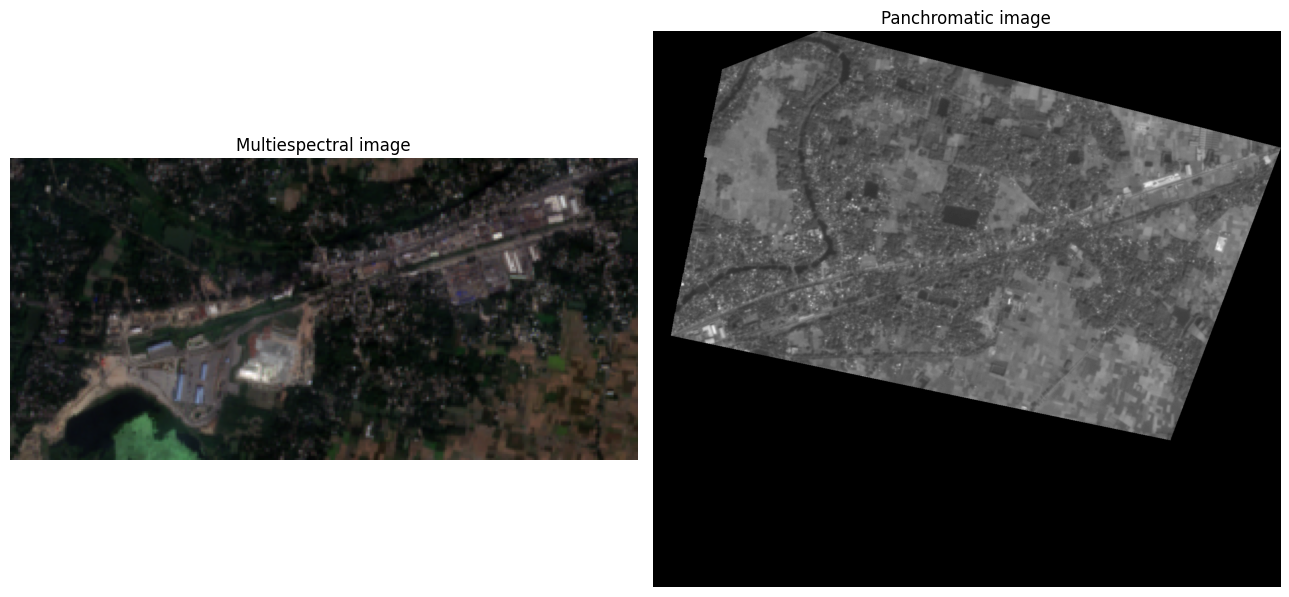

In [ ]:
# Multiespectral image normalization
R = (((R-np.amin(R))/(np.amax(R)-np.amin(R)))*255).astype(int)
G = (((G-np.amin(G))/(np.amax(G)-np.amin(G)))*255).astype(int)
B = (((B-np.amin(B))/(np.amax(B)-np.amin(B)))*255).astype(int)
xs = np.concatenate((R,G), axis=2)
xs = np.concatenate((xs,B), axis=2)

# Panchromatic image normalization
pan = (((img_pan-np.amin(img_pan))/(np.amax(img_pan)-np.amin(img_pan)))*255).astype(int)

# Container creation, to fit the plots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(13, 10))

# Add the multiespectral image to the container
ax0.imshow(xs)
ax0.set_title("Multiespectral image")
ax0.axis('off')

# Add the panchromatic image to the container
ax1.imshow(pan, 'gray')
ax1.set_title("Panchromatic image")
ax1.axis('off')

plt.tight_layout()